**Задание**

**Цель:**
Изучить применение моделей кластеризации

**Описание задания:**

В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

  a) Для отображения картинки воспользуйтесь вспомогательной функцией:

```
import matplotlib.pyplot as plt
import cv2
import skimage
def draw_picture(image, title, bgr=False):
b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
new_image = cv2.merge([r, g, b])
plt.figure(figsize=(7, 5))
plt.axis(‘off’)
plt.imshow(new_image)
plt.title(title)
plt.show()
```

  b) Для загрузки картинки можно использовать код:
`img = cv.imread(path)`

2. Реализуйте три модели кластеризации:

  a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

  b) DBSCAN

  c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.
4. Сформулируйте выводы по проделанной работе.

  a) Какая модель показала лучший результат?

Для получения зачета по этому домашнему заданию минимально должно быть реализовано обучение трех моделей с одним и тем же значением кластеров, где такой параметр присутствует.

**1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).**

  **a) Для отображения картинки воспользуйтесь вспомогательной функцией:**

```
import matplotlib.pyplot as plt
import cv2
import skimage
def draw_picture(image, title, bgr=False):
b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
new_image = cv2.merge([r, g, b])
plt.figure(figsize=(7, 5))
plt.axis(‘off’)
plt.imshow(new_image)
plt.title(title)
plt.show()
```

  **b) Для загрузки картинки можно использовать код:**
`img = cv.imread(path)`

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
def draw_picture(image, title, bgr=False):
  b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
  new_image = cv2.merge([r, g, b])
  plt.figure(figsize=(7, 5))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

In [ ]:
klumba = cv2.imread('Klumba.jpg')

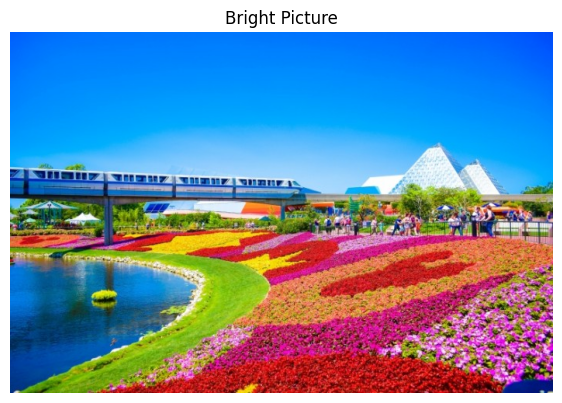

In [ ]:
draw_picture(klumba, 'Bright Picture', bgr=False)

**2. Реализуйте три модели кластеризации:**

**3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.**

  **a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from skimage.metrics import structural_similarity as ssim

In [ ]:
# Получение массива признаков пикселей из изображения:
z = klumba.reshape((-1, 3))
# Преобразование элементов массива из целых чисел в вещественные:
z = np.float32(z)
z

array([[255.,  92.,   0.],
       [255.,  92.,   0.],
       [253.,  93.,   0.],
       ...,
       [172., 213., 205.],
       [175., 213., 201.],
       [171., 210., 195.]], dtype=float32)

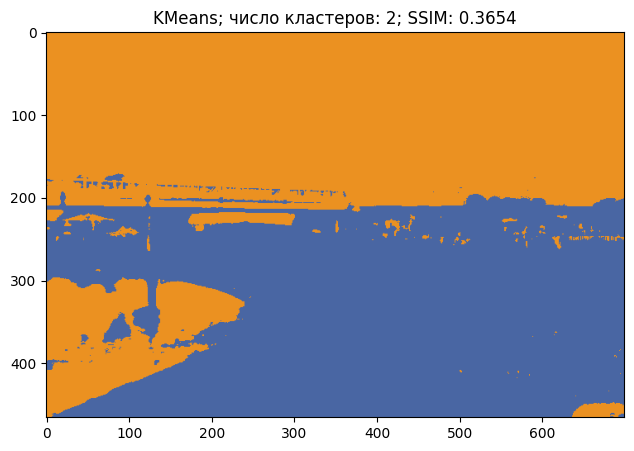

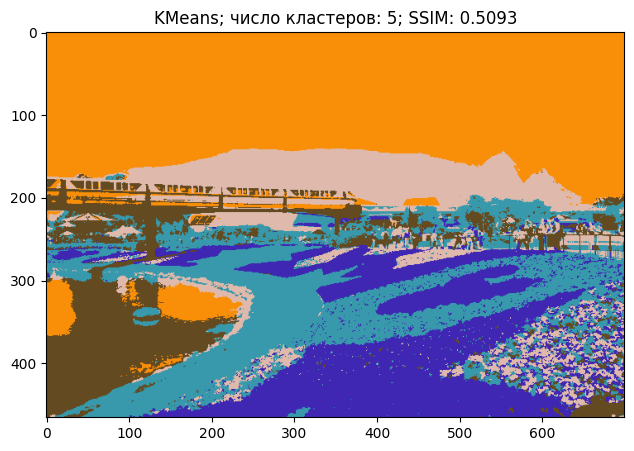

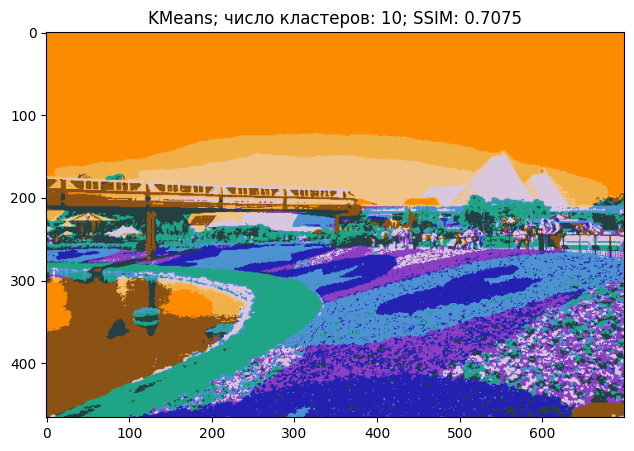

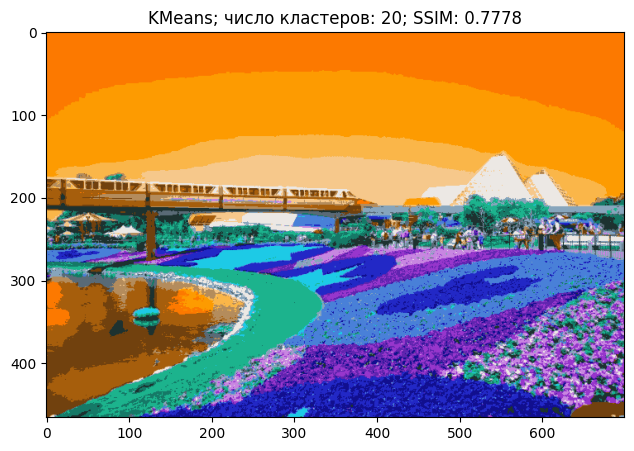

In [ ]:
# Обучение модели KMeans:
n_clusters = [2, 5, 10, 20]
for cluster in n_clusters:
  model_KM = KMeans(n_clusters=cluster, n_init='auto', random_state=9)
  model_KM.fit(z)

  labels = model_KM.predict(z) # Метки получившихся кластеров
  cc_KM = model_KM.cluster_centers_ # Массив с координатами центроидов кластеров

  сс_KM_int = np.uint8(cc_KM) # Преобразование координат центроидов в целые числа

  new_image = сс_KM_int[labels.flatten()]

  new_image_res = new_image.reshape((klumba.shape))

  # Результирующее изображение:
  plt.figure(figsize=(9, 5))
  plt.title(f"KMeans; число кластеров: {cluster}; SSIM: {ssim(klumba, new_image_res, channel_axis=2):.4f}") # Метрику SSIM выведем в заголовке каждого изображения
  plt.imshow(new_image_res)

  **b) DBSCAN**

Уменьшим размер исходного изображения:

In [ ]:
# Уменьшение разрешения исходного изображения:
klumba_db = cv2.resize(klumba, (350, 233))

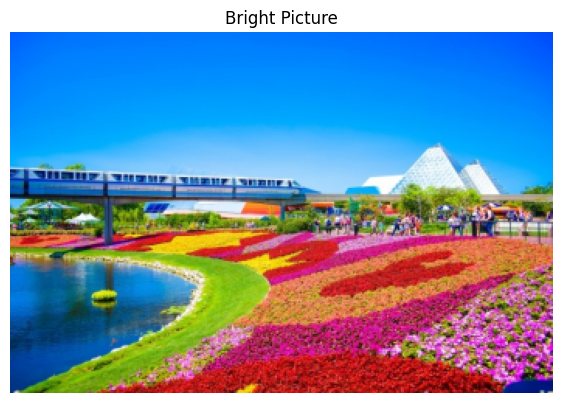

In [ ]:
# Исходное изображение для работы модели DBSCAN:
draw_picture(klumba_db, 'Bright Picture', bgr=False)

In [ ]:
# Получение массива признаков пикселей из изображения:
z_db= klumba_db.reshape((-1, 3))
# Преобразование элементов массива из целых чисел в вещественные:
z_db = np.float32(z_db)
z_db

array([[255.,  92.,   0.],
       [253.,  93.,   0.],
       [253.,  93.,   0.],
       ...,
       [151., 173., 165.],
       [157., 184., 177.],
       [160., 185., 171.]], dtype=float32)

In [ ]:
# Обучение модели:
model_DB = DBSCAN(eps=3, min_samples=10)
model_DB.fit(z_db)

DBSCAN(eps=3, min_samples=10)

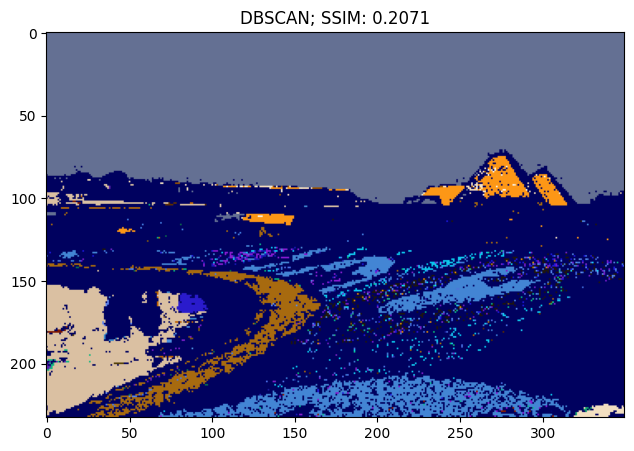

In [ ]:
# Уникальные значения меток кластеров:
labels_db = list(np.unique(model_DB.labels_))

  # Список с точками - центрами кластеров будем заполнять в цикле:
cent_c = []
  # Для каждой уникальной метки кластера
for i in labels_db:
    # отбираем точки исходного объекта, относящиеся к данному кластеру:
  points_of_cluster = z_db[model_DB.labels_== i,:]
    # находим среднее значение отобранных точек, преобразуем в int:
  centroid_of_cluster = list(np.uint8(np.mean(points_of_cluster, axis=0)))
    # добавляем в список с центрами класеров
  cent_c.append(centroid_of_cluster)

# Преобразуем список в np.array:
arr_cent_c = np.array(cent_c)

# Строим изображение:
new_image_db = arr_cent_c[model_DB.labels_.flatten()]
new_image_res_db = new_image_db.reshape((klumba_db.shape))

plt.figure(figsize=(9, 5))
plt.title(f"DBSCAN; SSIM: {ssim(klumba_db, new_image_res_db, channel_axis=2):.4f}") # Метрику SSIM выведем в заголовке изображения
plt.imshow(new_image_res_db)

  **c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.**

In [ ]:
# Уменьшение разрешения исходного изображения:
klumba_ac = cv2.resize(klumba, (174, 116))

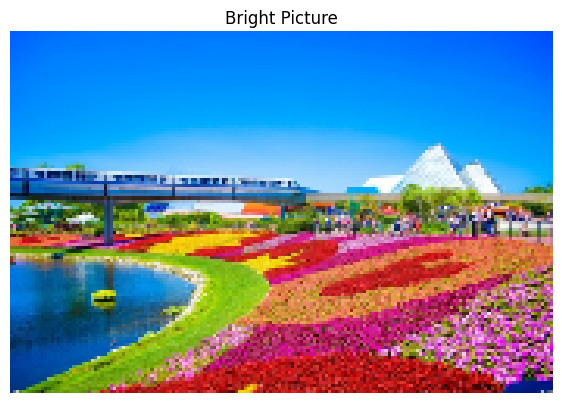

In [ ]:
# Исходное изображение для работы модели AgglomerativeClustering:
draw_picture(klumba_ac, 'Bright Picture', bgr=False)

In [ ]:
# Получение массива признаков пикселей из изображения:
z_ac = klumba_ac.reshape((-1, 3))
# Преобразование элементов массива из целых чисел в вещественные:
z_ac = np.float32(z_ac)
z_ac

array([[253.,  93.,   0.],
       [254.,  94.,   0.],
       [253.,  95.,   0.],
       ...,
       [128.,  39.,   4.],
       [125.,  87.,  73.],
       [129., 112., 102.]], dtype=float32)

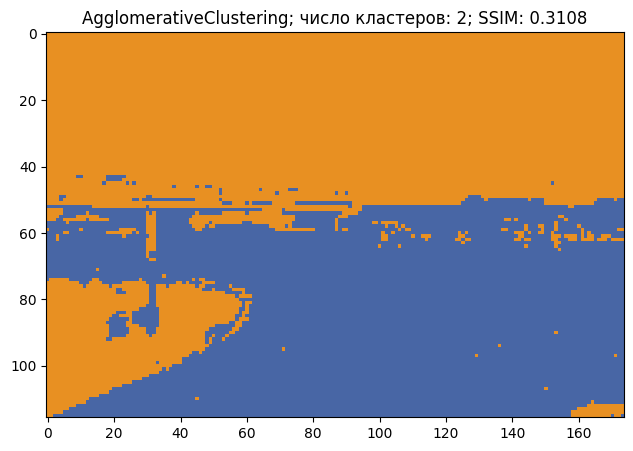

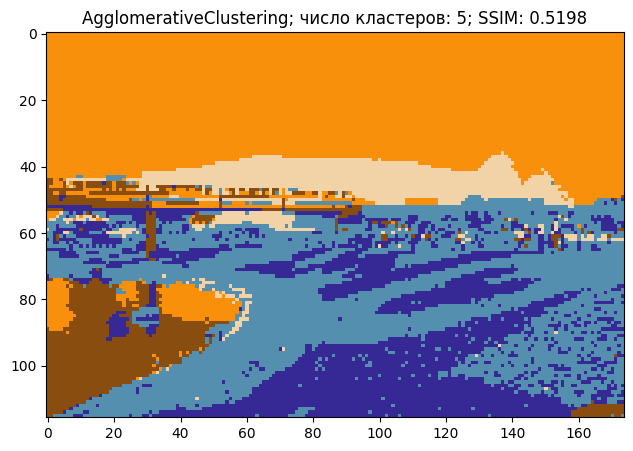

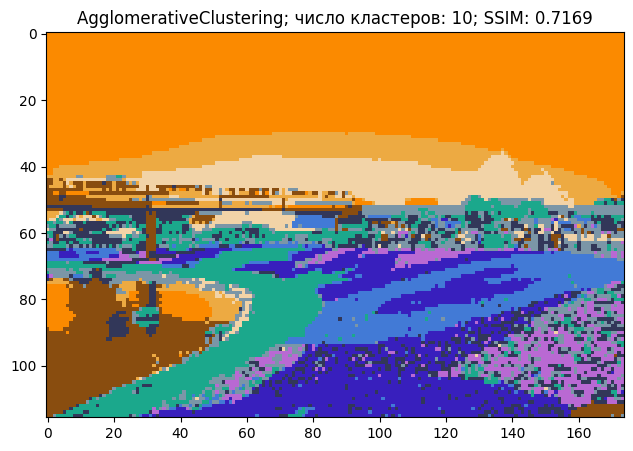

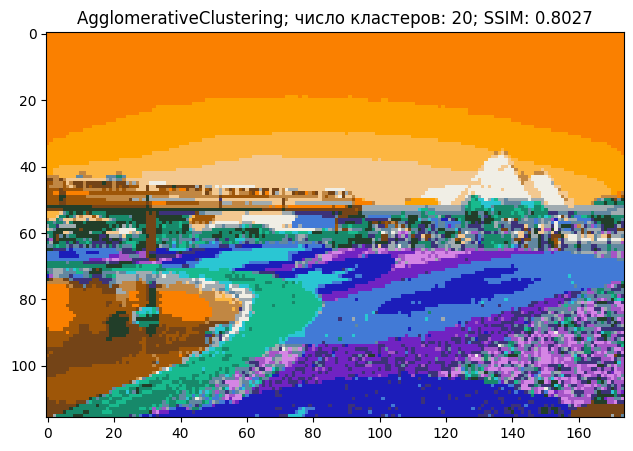

In [ ]:
# Обучение модели AgglomerativeClustering:
n_clusters = [2, 5, 10, 20]

for cluster in n_clusters:
  model_AC = AgglomerativeClustering(n_clusters=cluster)
  clustering = model_AC.fit(z_ac)

  # Уникальные значения меток кластеров:
  labels_ac = list(np.unique(clustering.labels_))

  # Список с точками - центрами кластеров будем заполнять в цикле:
  cent_c = []
  # Для каждой уникальной метки кластера
  for i in labels_ac:
    # отбираем точки исходного объекта, относящиеся к данному кластеру:
    points_of_cluster = z_ac[clustering.labels_== i,:]
    # находим среднее значение отобранных точек, преобразуем в int:
    centroid_of_cluster = list(np.uint8(np.mean(points_of_cluster, axis=0)))
    # добавляем в список с центрами класеров
    cent_c.append(centroid_of_cluster)

  # Преобразуем список в np.array:
  arr_cent_c = np.array(cent_c)

  # Строим изображение:
  new_image_ac = arr_cent_c[clustering.labels_.flatten()]
  new_image_res_ac = new_image_ac.reshape((klumba_ac.shape))

  plt.figure(figsize=(9, 5))
  plt.title(f"AgglomerativeClustering; число кластеров: {cluster}; SSIM: {ssim(klumba_ac, new_image_res_ac, channel_axis=2):.4f}") # Метрику SSIM выведем в заголовке каждого изображения
  plt.imshow(new_image_res_ac)


**4. Сформулируйте выводы по проделанной работе.**

  **a) Какая модель показала лучший результат?**

Визуально хорошие результаты дали модели KMeans и AgglomerativeClustering, при числе кластеров, равном 20-ти, данные модели показали самые большие метрики качества (0,7778 и 0,8027 соответственно).
Недостаток алгоритма AgglomerativeClustering - он требует больше ресурсов памяти, поэтому выполнялся на изображении меньшего разрешения.

Изображение, полученное в результате работы модели DBSCAN зашумлено и имеет низкую метрику SSIM, но алгоритм работает довольно быстро.